<a href="https://colab.research.google.com/github/Shi-pra-19/dl-genai-project/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA EXPLORATION**

##**OVERVIEW**

Shape: 6,827 rows × 8 columns

Columns: id, text, anger, fear, joy, sadness, surprise, emotions

Missing Values: None — the dataset is complete.

Text Statistics:

* Number of unique texts: 4,986

* Most frequent text: #name? (7 occurrences)

* 95th percentile text length: 38 words

Label Distribution (num_labels = number of emotions per text):

* 0 emotions: 676

* 1 emotion: 2,743

* 2 emotions: 2,587

* 3 emotions: 706

* 4 emotions: 112

* 5 emotions: 3


**Load libraries, apply styling, download NLTK stopwords, and import the train/test datasets for analysis.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
from wordcloud import WordCloud
from tqdm.auto import tqdm

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

plt.style.use('ggplot')
sns.set_palette('coolwarm')

df = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,id,text,anger,fear,joy,sadness,surprise,emotions
0,0,the dentist that did the work apparently did a...,1,0,0,1,0,['anger' 'sadness']
1,1,i'm gonna absolutely ~~suck~~ be terrible duri...,0,1,0,1,0,['fear' 'sadness']
2,2,"bridge: so leave me drowning calling houston, ...",0,1,0,1,0,['fear' 'sadness']
3,3,after that mess i went to see my now ex-girlfr...,1,1,0,1,0,['anger' 'fear' 'sadness']
4,4,"as he stumbled i ran off, afraid it might some...",0,1,0,0,0,['fear']


In [ ]:
test.head()

,id,text
0,0,she wanted to fight over every single little t...
1,1,"anyway, back to tuesday."
2,2,she shrieked at the dog to go back.
3,3,yelling for everyone to get back or get inside...
4,4,still kind of freaky.


In [ ]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing values:\n", df.isna().sum())

Shape: (6827, 8)
Columns: ['id', 'text', 'anger', 'fear', 'joy', 'sadness', 'surprise', 'emotions']
Missing values:
 id          0
text        0
anger       0
fear        0
joy         0
sadness     0
surprise    0
emotions    0
dtype: int64


**The dataset contains 6827 rows and 8 columns: 'id', 'text', 'anger', 'fear', 'joy', 'sadness', 'surprise', and 'emotions'. There are no missing values in any column.**

In [ ]:
print("Shape:", test.shape)
print("Columns:", test.columns.tolist())
print("Missing values:\n", test.isna().sum())

Shape: (1707, 2)
Columns: ['id', 'text']
Missing values:
 id      0
text    0
dtype: int64


**The test dataset contains 1707 rows and 2 columns: 'id' and 'text'. There are no missing values in any column.**

In [ ]:
print(df['text'].describe())

count       6827
unique      4986
top       #name?
freq           7
Name: text, dtype: object


**Upon analyzing the 'text' column, we observe that the dataset contains a total of 6827 entries. Out of these, 4986 entries are unique, indicating that some texts appear more than once. The most frequent text in the dataset is '#name?', which occurs 7 times.**

In [ ]:
df['text_len'] = df['text'].apply(lambda x: len(x.split()))
p95 = np.percentile(df['text_len'], 95)
print(f"95th percentile text length = {p95} words")

95th percentile text length = 38.0 words


**Calculated the 95th percentile of text lengths, showing that 95% of the texts have 38 words or fewer. This was done by splitting each text into words and computing the percentile.**

In [ ]:
df['text'].value_counts()


,count
text,
#name?,7
i shook my head.,6
my heart dropped.,3
my heart sinks.,3
my heart sank.,3
...,...
so all is well and the sun is shining and the flowers are smiling and my heart is glowing.,1
i did nt notice it until it crawled all over my hand like a maniac.,1
"despite my anxiety, you were there with me, diligently working in my heart, stripping me of all of my pretense, scourging me of all of my arrogance, revealing each of my self-serving ways, which have made my life a wasteland.",1


In [ ]:
test['text'].value_counts()


,count
text,
my heart sank.,3
#name?,3
then they kill him.,2
"each one of these could be a post all its own, but for the sake of time i'll simply list them:",2
< 3 so i can now officially say that chicago holds my heart in more ways than one.,2
...,...
"i yell out a friendly ""to your right!",1
sore my tongue pericing experince!,1
"the park is a small field, the only way out is at one end with a small fence with a gate, otherwise it's closed off.",1


In [ ]:
duplicates = df['text'].value_counts().to_frame('count')
duplicates = duplicates[duplicates['count'] > 1]
print(duplicates)


                                                    count
text                                                     
#name?                                                  7
i shook my head.                                        6
my heart dropped.                                       3
my heart sinks.                                         3
my heart sank.                                          3
...                                                   ...
as you can imagine word spread like wildfire.           2
but theres nothing, i can see clear                     2
i closed my eyes and listened to the silence wh...      2
then i nipped back to the vater's house to boil...      2
i couldn't break my leg, could i?                       2

[1829 rows x 1 columns]


**Top repeated texts in the dataset are shown, with '#name?' appearing 7 times, followed by other frequent texts like 'i shook my head.' appearing 6 times. In total, 1829 unique texts occur more than once.**


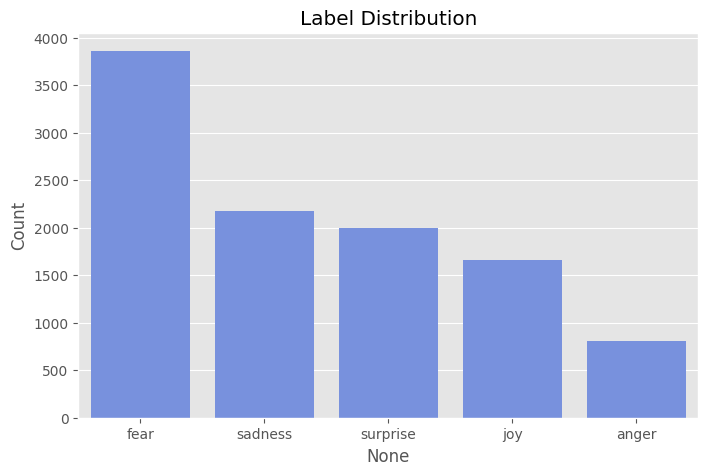

In [ ]:
label_cols = ['anger','fear','joy','sadness','surprise']


label_counts = df[label_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Label Distribution")
plt.ylabel("Count")
plt.show()




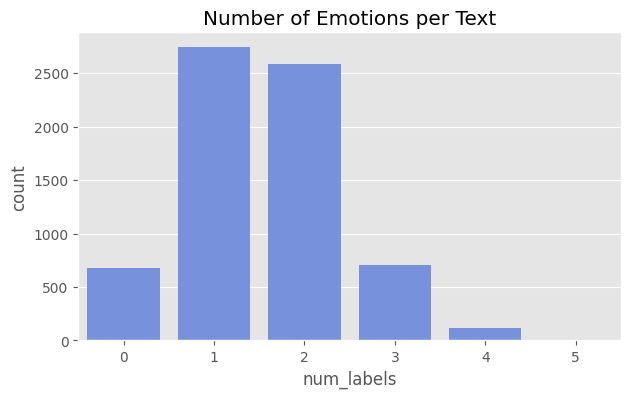

num_labels
0     676
1    2743
2    2587
3     706
4     112
5       3
Name: count, dtype: int64


In [ ]:
df['num_labels'] = df[label_cols].sum(axis=1)
plt.figure(figsize=(7,4))
sns.countplot(x='num_labels', data=df)
plt.title("Number of Emotions per Text")
plt.show()

print(df['num_labels'].value_counts().sort_index())

**Distribution of samples by the number of labels: most texts have 1 or 2 labels, while very few have 5 or 6 labels, indicating a largely single- or dual-label dataset.**

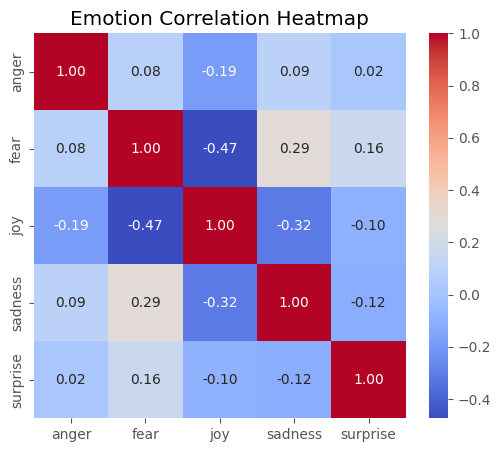

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(df[label_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Emotion Correlation Heatmap")
plt.show()

**Top Words**



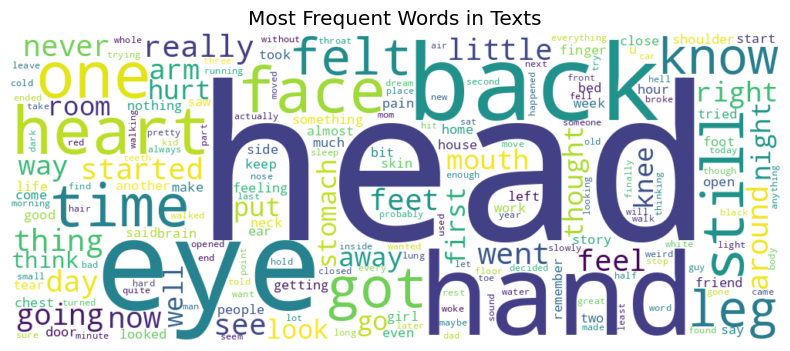

In [ ]:

all_words = df['text']

wc = WordCloud(width=1000, height=400, background_color="white").generate(" ".join(all_words))
plt.figure(figsize=(10,4))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Texts")
plt.show()

**Top Words per Label**

In [ ]:


text = " ".join(df['text'].astype(str))

tokens = re.findall(r'\b\w+\b', text.lower())

common_words = Counter(tokens).most_common(25)

print("Top 25 most common words:")
print(pd.DataFrame(common_words, columns=['word','freq']).head(25))

Top 25 most common words:
    word  freq
0     my  5624
1      i  5224
2    the  4259
3    and  3591
4     to  2932
5      a  2265
6    was  1798
7     it  1669
8     of  1641
9     in  1605
10  that  1040
11    on  1027
12    me   807
13  with   755
14   but   734
15    up   714
16  this   690
17    is   672
18    at   657
19    so   630
20     t   604
21   out   593
22   for   585
23    as   565
24  head   545


In [ ]:
stop_words = set(stopwords.words('english'))
def tokenize(text):
    return [w for w in re.findall(r'\b\w+\b', text.lower()) if w not in stop_words]

for label in label_cols:
    texts = " ".join(df[df[label]==1]['text'])
    tokens = tokenize(texts)
    common = Counter(tokens).most_common(10)
    print(f"\nTop words for '{label}':")
    print(pd.DataFrame(common, columns=['word','freq']))


Top words for 'anger':
    word  freq
0    one    52
1   like    44
2   head    44
3    get    37
4   time    36
5   face    34
6   back    34
7  hands    32
8  never    30
9    got    27

Top words for 'fear':
    word  freq
0   head   359
1   eyes   258
2   like   254
3   back   234
4    get   203
5    one   192
6  still   190
7  heart   165
8   time   163
9   face   149

Top words for 'joy':
    word  freq
0   head   120
1   eyes   113
2   like   111
3  heart   103
4    got    88
5   back    86
6    one    85
7   face    78
8    get    68
9   hand    68

Top words for 'sadness':
    word  freq
0   head   192
1  heart   175
2   eyes   174
3   like   152
4   back   152
5  never   118
6  still   114
7   face   113
8    one   112
9   time   104

Top words for 'surprise':
    word  freq
0    one   131
1   like   103
2   eyes    98
3   head    95
4  still    83
5  never    77
6   know    73
7    saw    72
8   back    68
9    see    63


Text(0.5, 0, 'Word Count')

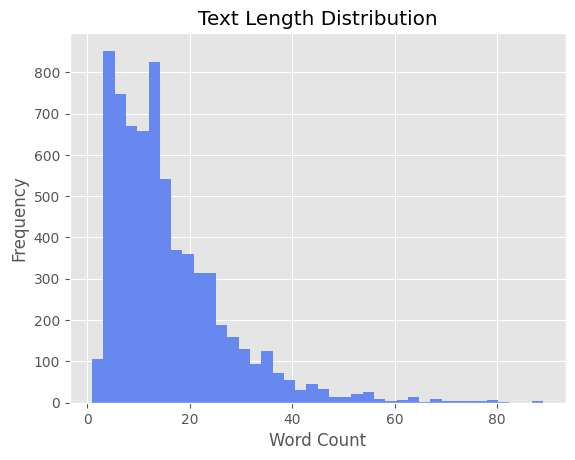

In [ ]:
df['text_len'] = df['text'].astype(str).apply(lambda x: len(x.split()))
df['text_len'].describe()

df['text_len'].plot.hist(bins=40, title='Text Length Distribution')
plt.xlabel('Word Count')

In [ ]:
stop_words = set(stopwords.words('english'))
tokens_clean = [w for w in tokens if w not in stop_words]
Counter(tokens_clean).most_common(25)

[('one', 131),
 ('like', 103),
 ('eyes', 98),
 ('head', 95),
 ('still', 83),
 ('never', 77),
 ('know', 73),
 ('saw', 72),
 ('back', 68),
 ('see', 63),
 ('going', 60),
 ('day', 60),
 ('time', 60),
 ('get', 58),
 ('really', 57),
 ('face', 56),
 ('room', 54),
 ('got', 53),
 ('started', 50),
 ('thing', 49),
 ('went', 48),
 ('weird', 44),
 ('right', 44),
 ('door', 44),
 ('something', 43)]